# **Handling Outliers Exercise**

In [1]:
import pandas as pd

df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.shape

(13200, 7)

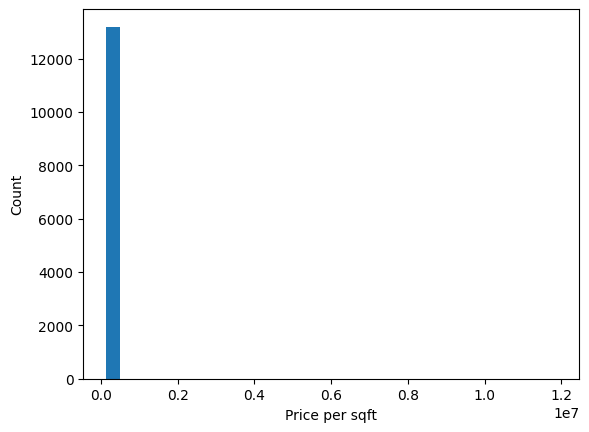

In [3]:
import matplotlib.pyplot as plt

plt.hist(df.price_per_sqft, bins=20, rwidth=0.6)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

## **Treat Outliers using Percentile**

In [4]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [5]:
df[df.price_per_sqft < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [6]:
df[df.price_per_sqft > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [7]:
df_percentile = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]

In [8]:
df_percentile.shape

(13172, 7)

In [9]:
df.shape[0] - df_percentile.shape[0]

28

We removed 28 outliers.



---



## **Handling Outliers using 4 Standard Deviation**

In [10]:
df.price_per_sqft.mean()

np.float64(7920.336742424242)

In [11]:
df.price_per_sqft.std()

106727.16032810845

In [12]:
upper_limit = df_percentile.price_per_sqft.mean() + 4 * df_percentile.price_per_sqft.std()
upper_limit

np.float64(23227.73653589429)

In [13]:
lower_limit = df_percentile.price_per_sqft.mean() - 4 * df_percentile.price_per_sqft.std()
lower_limit

np.float64(-9900.429065502549)

In [14]:
df_no_outlier_std = df_percentile[(df_percentile.price_per_sqft > lower_limit) & (df_percentile.price_per_sqft < upper_limit)]
df_percentile.shape[0] - df_no_outlier_std.shape[0]

125

We removed 125 more outliers.

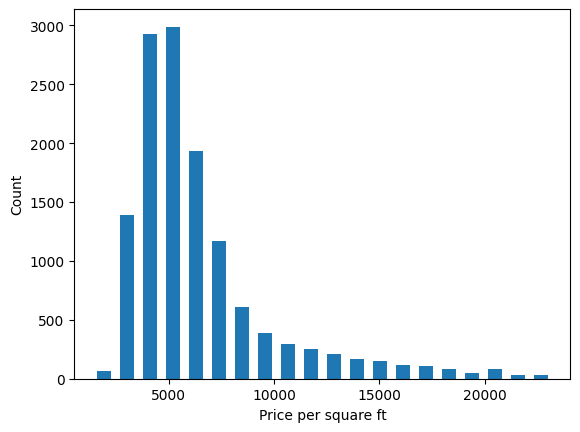

In [15]:
plt.hist(df_no_outlier_std.price_per_sqft, bins=20, rwidth=0.6)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

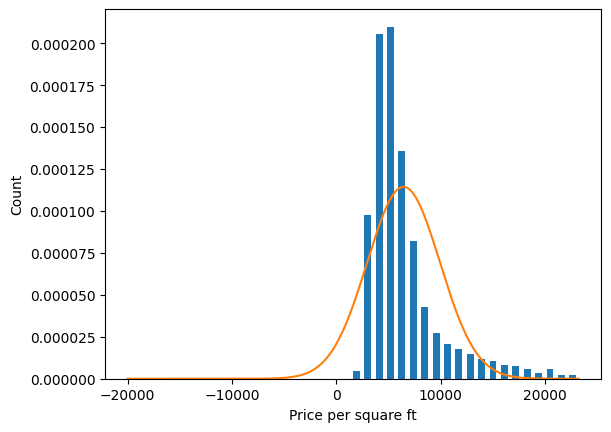

In [16]:
import numpy as np
from scipy.stats import norm

plt.hist(df_no_outlier_std.price_per_sqft, bins=20, rwidth=0.6, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

rng = np.arange(-20000, df_no_outlier_std.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df_no_outlier_std.price_per_sqft.mean(), df_no_outlier_std.price_per_sqft.std()))
plt.show()

## **Handling Outliers using Z-score**

In [17]:
df_percentile['zscore'] = (df_percentile.price_per_sqft - df_percentile.price_per_sqft.mean()) / df_percentile.price_per_sqft.std()

<ipython-input-17-22b4227dc1de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentile['zscore'] = (df_percentile.price_per_sqft - df_percentile.price_per_sqft.mean()) / df_percentile.price_per_sqft.std()


In [18]:
df_no_outlier_zscore = df_percentile[(df_percentile.zscore > -4) & (df_percentile.zscore < 4)]

In [19]:
df_percentile.shape[0] - df_no_outlier_zscore.shape[0]

125

In this step we also removed 125 outliers like 4 std.